# Experiment 9 - Geiger-Müller Tube

### Date: 25/03/19 - 26/03/19
### Group Members: Luke Whitehead, Alex Goodenbour

## Introduction

The aim of this investigation was to determine the dead time and operating efficiency of a Geiger-Müller Tube, making use of ${}^{90}Sr$ and ${}^{60}Co$ sources. This investigation also calculated the background radiation of the lab. This background radiation is due to cosmic rays and other nearby radioactive sources (although this is normally negligible).

After a particle causes a discharge in the G-M tube, the electric field in the tube falls below the usual operating voltage and the tube will, for a short period, not detect later particles. This time period, usually a few hundred microseconds, is called the dead time. The existence of this finite time $\tau$ means that to determine the true counting rate $R$, a correction needs to be made to the observed counting rate $R_0$:

$R=\frac{R_0}{1-R_0\tau}$

The G-M tube is not 100% efficient, so not all of the rays emitted by a source will be detected. The operating efficiency of a G-M tube can be calculated by using the activity rate of the source to find the expected number of counts at the tube. 

## Method

Before measurements could be taken, the optimum operating voltage of the G-M Tube needed to be determined. At around this voltage, the count rate is independent of small variations in the operating voltage. By plotting applied voltage against detected count rate, a plateau region corresponds approximately to the optimal operating voltage. We then proceeded to use this voltage for the remainder of the experiment so that we could reduce the effect of small variations in the tube voltage on our count rates.

A radioactive ${}^{90}Sr$ source was placed 5 cm from the G-M tube, which was turned on. The threshold voltage $V_0$ was first determined as the smallest value of the applied voltage that led to a non-zero count rate. The applied voltage was increased to $V_0 + 150$ and the distance increased until the count rate was $100 s^{-1}$. The applied voltage was reduced to just below the threshold voltage and incrementally increased as count rate was measured. The analysis shows the graph formed by this data, and the value of the applied voltage at the centre of the plateau was recorded and chosen as the optimal operating voltage for the rest of this investigation.

Task 2 was to calculate the background radiation in the lab. Without any radioactive sources, only background radiation is detected by the G-M tube. This background radiation is ionising radiation from both natural and man-made sources, such as cosmic radiation, naturally occurring radioactive substances, and even from nuclear weapons testing. The count number over a period of 10 minutes was measured, and used to calculate the background count rate in the analysis section below.

Task 3 was to calculate the dead time of the G-M tube. This can be done by the two-source method. The background radiation was measured over a period of 60s, and the number of counts recorded. This was checked by comparing this value to the expected rate calculated in Task 2. One ${}^{90}Sr$ source was directed towards the tube, and the number of counts in 60s recorded. Another ${}^{90}Sr$ source was directed towards the tube, and the number of counts from both sources in 60s was recorded. The process was repeated for the second source, without the first. Combining the two equations,

$(R_1 - R_b)-(R_2 - R_b) = (R_{12} - R_B)$ giving $R_1 + R_2 = R_{12}+R_B$

and 

$R_0 = R-\tau R_0R$ and $R = \frac{R_0}{1-R_0 \tau}$

We get:

$\frac{1}{1-R_1\tau}+\frac{1}{1-R_2\tau}=\frac{1}{1-R_{12}\tau}+\frac{1}{1-R_b\tau}$

This reduces to a quadratic equation which can be solved for the deadtime $\tau$. As is done in the below analysis section.

A G-M tube is never 100% efficient. Especially with respect to gamma radiation, 90% of gamma radiation passes through without interacting with the apparatus in any way. So, in the final section of this investigation, we set out to measure the efficiency of our G-M Tube setup for two different radioactive sources. A ${}^{90}Sr$ source and a ${}^{60}Co$ source. Both these sources can be considered isotropic, meaning that they emit radiation in all directions equally. As the detection window has a finite circular area. We can determine the expected count rate for each source by taking the percentage of the surface area of the sphere with a radius equal to the distance of the source from the detection window equal to the area of the detection window. This ratio is given by:

$\frac{A_{GM}}{A_{sph}} = \frac{\pi r^2}{4\pi R^2}= \frac{r^2}{4 R^2}$

Where $R$ is the distance of the source from the detector, and $r$ is the radius of the source window.

We also needed to determine the up-to-date activity rates for the two sources, which decay exponentially and therefore can be modelled by:

$A_{current} = A_{old}e^{-\lambda t}$

We were therefore comparing the expected rate if the detector had been 100% efficient given by the above equations with the observed count rate to compute our efficiencies for each of the sources.

## Analysis

In [1]:
# Setup and helper function definition
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def round_to_1(x):
    return round(x, -int(np.floor(np.log10(abs(x)))))


## Determinination of the G-M Tube Operating Voltage

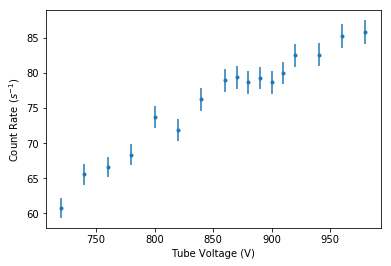

In [2]:
# Importing and processing the data
data = np.genfromtxt("geiger.csv", delimiter=",")
tube_voltage = np.array(data[:,0])
N = np.array(data[:,1])
T = np.array(data[:,2])
N_unc = np.sqrt(N)
count_rate = N/T
count_rate_unc = N_unc/T


# Plots a scatter plot with linear regression
def plot_scatter(x,y,sigma_y, sigma_x, title, xlabel, ylabel):
    plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
    
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot_scatter(tube_voltage, count_rate, count_rate_unc, 0, 
             "Investigating the Optimum Operating Voltage for a G-M Tube",
             "Tube Voltage (V)",
             "Count Rate ($s^{-1}$)"
            )

We see that on the scatter plot above, there is a plateau between 860 and 910 Volts. Therefore we chose a value of 900V as the optimum operating voltage for our G-M Tube as for this value of the tube voltage, a small change in tube voltage in either direction would not have a large impact on count rate. This value of 900V was used throughout the rest of this investigation as to minimise the effect of variations in tube voltage on the count rate.

## Background Radiation

In [3]:
count_number = 449
count_time_min = 10 # 10 minutes
count_time_sec = count_time_min * 60 

count_unc = np.sqrt(count_number)

count_rate_min = count_number / count_time_min
count_rate_min_unc = count_rate_min * count_unc / count_number

count_rate_sec = count_number / count_time_sec
count_rate_sec_unc = count_rate_sec * count_unc / count_number

print("Background Radiation per minute: {:.4f} ± {}".format(count_rate_min, round_to_1(count_rate_min_unc)))
print("Background Radiation per second: {:.4f} ± {}".format(count_rate_sec, round_to_1(count_rate_sec_unc)))



Background Radiation per minute: 44.9000 ± 2.0
Background Radiation per second: 0.7483 ± 0.04


## Measurement of Resolving Time of the Counter

In [4]:
# Returns deadtime and uncertainty in microseconds
def deadtime(values):
    T = float(values[0])
    if T != abs(T):
            raise Exception("Count time must be real and positive. Try again.")

    Nb = float(values[1])
    N1 = float(values[2])
    N12 = float(values[3])


    if N12>N1:
        N2 = float(values[4])
        if N12 > N2:
            A = N1+N2
            B = N12+Nb
            if B>=A:
                raise Exception("""
                The statistical uncertainties in your measurements are
                too large to permit a physically sensible value of the
                deadtime of the GM counter. You should repeat your 
                measurements with a more suitable placement of the sources
                with due regard to the value of the background count.
                """)
            H = A-B
            DH = np.sqrt(A+B)
            if (H/DH) < 6:
                raise Exception("""
                Your experimental results will give a value of the dead-time
                whose uncertainty is far too large. You should repeat the 
                measurements with a higher count rate.
                """)
            else: 
                C = N1*N2
            D = N12*Nb
            E = C-D
            F = B*C-A*D
            Z = E - np.sqrt(E**2-H*F)
            G = Z/F
            tau = np.fix(1000000*G*T)
            
            DE = np.sqrt(A*C+B*D)
            DF = np.sqrt(A*B*B*C+B*C*C-4*A*C*D-4*B*C*D+A*A*B*D+A*D*D)
            DHF = np.sqrt((H*DF)**2+(F*DH)**2)
            DZ = np.sqrt(DHF**2/4+(Z*DE)**2)/(E-Z)
            DG = np.sqrt((F*DZ)**2+(Z*DF)**2)/F**2
            Dtau = np.fix(1000000*DG*T)
            return tau, Dtau

values = [
    60,    # Time measured
    48,    # Background count
    54388, # Count with source 1 in place
    77633, # Count with sources 1 and 2 in place
    42607  # Count with source 2 in place
]
dtime, dtime_unc = deadtime(values)
print("Deadtime is {} ± {} microseconds.".format(dtime,round_to_1(dtime_unc)))

Deadtime is 314.0 ± 10.0 microseconds.


## Determination of Detector Efficiency

In [5]:
dead_time = dtime*10**(-6)
dead_time_unc = dtime_unc*10**(-6)

# Inline function to compute current activity
current_activity = lambda hl, ar, et: ar*np.exp(-np.log(2)*et/hl)

# Halflife: 10512 days, Old Activity rate: 3.1e6 MBq, Elapsed Time: 8839 days
today_activity_rate_sr = current_activity(10512,3.1e6,8839)

# Halflife: 1924 days, Old Activity rate: 3.7e6 MBq, Elapsed Time: 2032 days
today_activity_rate_co = current_activity(1924,3.7e6,2032)

gm_window_diameter = 28.5e-3
source_gm_distance = 1

gm_window_area = np.pi*((gm_window_diameter/2)**2)

sphere_area = 4*np.pi*(source_gm_distance**2)

ratio_gm_source = gm_window_area/sphere_area


def get_efficiency(t, activity_rate ):

    measured_count_rate_min = t  #t = 60 seconds
    measured_count_rate_sec = measured_count_rate_min / 60

    true_count_rate = measured_count_rate_sec / (1- (measured_count_rate_sec*dead_time))

    expected_source_rate_gm = activity_rate * ratio_gm_source

    efficiency = true_count_rate / expected_source_rate_gm

    return efficiency

cobalt_efficiency = get_efficiency(716, today_activity_rate_co )
str_efficiency = get_efficiency(3880, today_activity_rate_sr )
    
print("Strontium Efficiency: {:.2f} %".format(str_efficiency * 100))
print("Cobalt Efficiency: {:.2f} %".format(cobalt_efficiency * 100))

Strontium Efficiency: 75.12 %
Cobalt Efficiency: 13.26 %


## Discussion

With the benefit of hindsight, there were certain aspects of this investigation that we would likely have done differently. When calculating the background radiation, we simply took one 10 minute recording to give us a singular value for the count and thus a singular value for the count rate meaning we could not determine an uncertainty for this reading. As our detector could have picked up outside radiation from the multitude of sources being used in the room, all pointing in different directions. Upon repeating this experiment, we would likely take at least 10 trials of a shorter time so that these results could be fitted to a gaussian distribution and thus giving us a value for the uncertainty of the average of these readings. We also could have taken further precautions to prevent stray radiation from being picked up by surrounding our detector with lead other than the opening through which we were sending radiation.

Another, perhaps overlooked, point was the relationship between the distance of the source from the detector and the calculated efficiency. As we made the assumptions that the source was isotropic, we expected that the calculated efficiency would be independent of the distance from the detector perhaps with small variations. However, through preliminary trials, we found that the distance from the detector did seem to have a large effect on the calculated efficiency, for some distances, giving an efficiency close to 200% which would mean that our isotropic assumption must not be true and we would likely have to reevaluate our method of efficiency calculation if we were to repeat this investigation. We could perhaps use another GM-tube with a known efficiency for each of the two sources and use readings taken by each of the GM-tubes to determine the unknown efficiencies in the first GM-tube.

In measuring the efficiency of the GM-tube, we also only restricted the efficiencies measured to each source. To further generalise these results we could have measured the efficiency for each type of radiation emitted by the sources rather than just the efficiency for 2 individual sources. For example we could have used wooden blocks to block beta radiation leaving only the gamma radiation which is able to penetrate wood, and therefore allowing us to calculate an efficiency for gamma radiation for this particular GM-tube. This would possibly be the further investigation with the highest priority as the large difference in operating efficiencies between two sources with different emission profiles indicates that there are large differences in efficiencies for the different kinds of ionising radiation.

## Conclusion

The aim of this investigation was to determine several characteristics of a given GM Tube. Specifically, its optimum operating voltage, deadtime and operating efficiency for a ${}^{90}Sr$ source and a ${}^{60}Co$ source. Through plotting the tube voltage and the count rate, we determined the optimum operating voltage to be around 900V as for this value of the tube voltage, the count rate was independent of small variations in the voltage. The deadtime of our GM Tube was determined to be 314.0 ± 10.0 microseconds. The operating efficiency of our GM Tube for a ${}^{90}Sr$ source was determined to be 75.12% and the efficiency for the ${}^{60}Co$ was determined to be 13.26%.